<a href="https://colab.research.google.com/github/budai4medtech/xfetus/blob/main/data/datasets/african_us_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# African Ultrasound Dataset

This notebook looks at a dataset containing maternal fetal ultrasound planes from low-resource imaging settings in five African countries. This dataset was first presented in the paper "[Generalisability of fetal ultrasound deep learning models to low-resource imaging settings in five African countries](https://www.nature.com/articles/s41598-023-29490-3)".  You can download the dataset [here](https://zenodo.org/record/7540448), but the notebook should download and setup everything automatically.  See the image below for example images

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-023-29490-3/MediaObjects/41598_2023_29490_Fig1_HTML.png" width="750">




## Setup

Download dataset and then add imports

In [1]:
!wget https://zenodo.org/record/7540448/files/Zenodo_dataset.tar.xz
!tar xf /content/Zenodo_dataset.tar.xz

--2023-08-28 10:47:59--  https://zenodo.org/record/7540448/files/Zenodo_dataset.tar.xz
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42845356 (41M) [application/octet-stream]
Saving to: ‘Zenodo_dataset.tar.xz’

Zenodo_dataset.tar. 100%[===================>]  40.86M   408KB/s    in 1m 44s  

2023-08-28 10:49:44 (403 KB/s) - ‘Zenodo_dataset.tar.xz’ saved [42845356/42845356]



In [2]:
import os
import itertools
import random

from torch.utils.data import Dataset
import pandas as pd
from skimage import io
from skimage.transform import resize
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms

## Dataset

Create the PyTorch dataset.

In [16]:
class AfricanFetalPlaneDataset(Dataset):
    """Fetal Plane dataset."""

    def __init__(self,
                 root_dir,
                 csv_file,
                 plane=None,
                 center=None,
                 transform=None,
                 size=256):

        # Select which images in the dataset to use
        self.root_dir = root_dir
        self.csv_file = pd.read_csv(csv_file, sep=',')
        if plane is not None:
            self.csv_file = self.csv_file[self.csv_file['Plane'] == plane]
        if center is not None:
            self.csv_file = self.csv_file[self.csv_file['Center'] == center]
        self.csv_file = self.csv_file.reset_index()

        # Save image properties
        self.size = size
        self.transform = transform

    def __len__(self):
        return len(self.csv_file)

    def __getitem__(self, idx):
        # Load the image from file
        print(self.csv_file['Plane'][idx]+', '+self.csv_file['Center'][idx]+', '+self.csv_file['Filename'][idx])
        file_name = self.root_dir + self.csv_file['Center'][idx] + '/' + self.csv_file['Filename'][idx] + '.png'
        image = io.imread(file_name)

        # Preprocess and augment the image
        if self.transform is not None:
            image = self.transform(image)

        # Resize the image
        image = resize(image, (self.size, self.size))
        small_image = resize(image.copy(), (self.size / 4, self.size / 4))
        return small_image, image

## Explore Data

Print some pictures

Fetal brain, Egypt, patient001_EGY_plane1


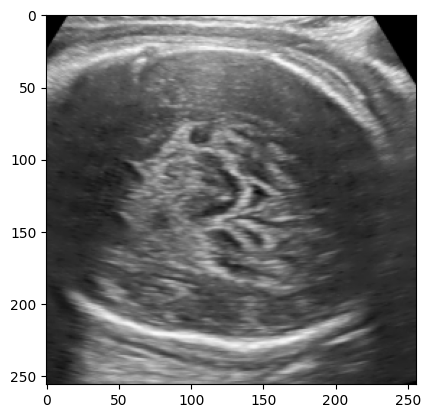

Fetal brain, Egypt, patient002_EGY_plane1


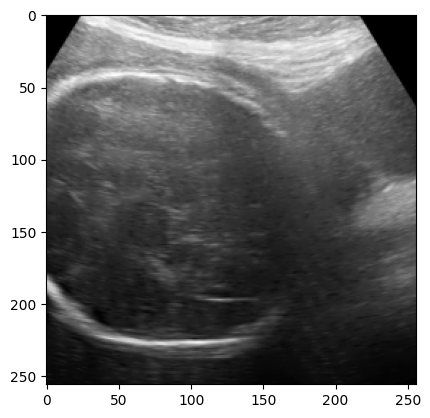

Fetal brain, Egypt, patient003_EGY_plane1


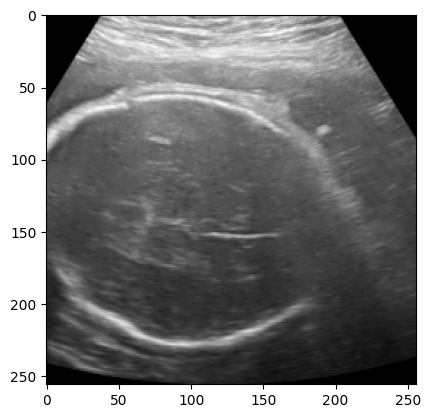

In [17]:
# Define dataset path
dataset_path = '/content/Zenodo_dataset/'
csv_path = dataset_path + 'African_planes_database.csv'

# Create dataset object
dataset = AfricanFetalPlaneDataset(dataset_path, csv_path, 'Fetal brain', 'Egypt')

# Show example images
for i in range(3):
    small_img, img = dataset[i]
    plt.imshow(img)
    plt.show()

Print the metadata contained within the csv file

In [8]:
csv_file = pd.read_csv(csv_path, sep=',')
print(csv_file)

     Patient_num          Plane  Train   Center               Filename
0              1  Fetal abdomen      0  Algeria  patient001_DZA_plane0
1              1    Fetal femur      0  Algeria  patient001_DZA_plane2
2              1    Fetal brain      0  Algeria  patient001_DZA_plane1
3              1   Fetal thorax      0  Algeria  patient001_DZA_plane3
4              4    Fetal brain      0  Algeria  patient004_DZA_plane1
..           ...            ...    ...      ...                    ...
445           53  Fetal abdomen      1    Ghana  patient053_GHA_plane0
446           53    Fetal brain      1    Ghana  patient053_GHA_plane1
447           55  Fetal abdomen      0    Ghana  patient055_GHA_plane0
448           55    Fetal femur      0    Ghana  patient055_GHA_plane2
449           55    Fetal brain      0    Ghana  patient055_GHA_plane1

[450 rows x 5 columns]


In [15]:
print(csv_file[csv_file['Center'] == 'Egypt'])

     Patient_num          Plane  Train Center               Filename
100            1  Fetal abdomen      0  Egypt  patient001_EGY_plane0
101            1    Fetal femur      0  Egypt  patient001_EGY_plane2
102            1   Fetal thorax      0  Egypt  patient001_EGY_plane3
103            1    Fetal brain      0  Egypt  patient001_EGY_plane1
104            2    Fetal femur      1  Egypt  patient002_EGY_plane2
..           ...            ...    ...    ...                    ...
195           26    Fetal brain      0  Egypt  patient026_EGY_plane1
196           28    Fetal femur      0  Egypt  patient028_EGY_plane2
197           28    Fetal brain      0  Egypt  patient028_EGY_plane1
198           28   Fetal thorax      0  Egypt  patient028_EGY_plane3
199           28  Fetal abdomen      0  Egypt  patient028_EGY_plane0

[100 rows x 5 columns]
